# notebook imports

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [3]:
cal_dataset = housing

In [4]:
print(dir(cal_dataset))
print(cal_dataset.DESCR)


['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in 

### Data points and Features

In [5]:
cal_dataset.data
cal_dataset.data.shape # chaining dot notation

(20640, 8)

In [6]:
cal_dataset.feature_names #00,000s

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
cal_dataset.target


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Data exploration

In [8]:
data = pd.DataFrame(data=cal_dataset.data , columns=cal_dataset.feature_names)

data['price'] = cal_dataset.target

In [9]:
data.head(6)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


In [10]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [11]:
data.count()

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
price         20640
dtype: int64

In [12]:
# checking for missing data
pd.isnull(data).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
price         False
dtype: bool

In [13]:
#alternate method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Data visualisation

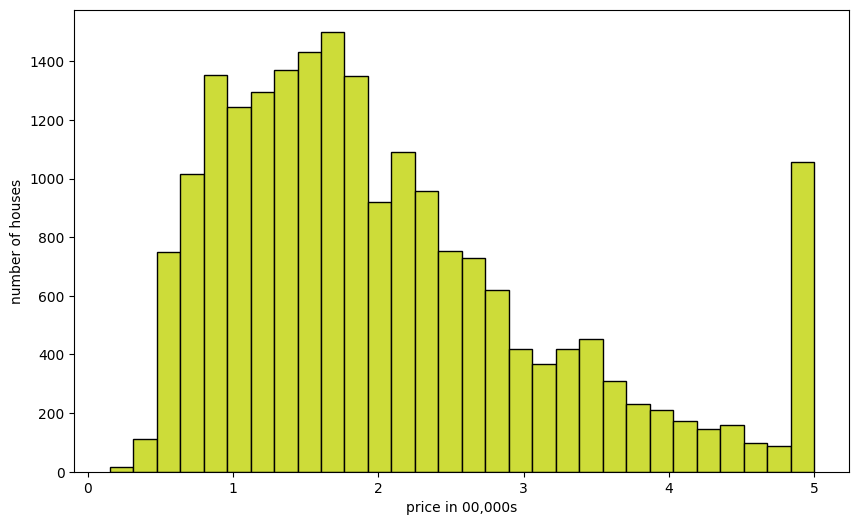

In [31]:
plt.figure(figsize=(10,7))
plt.hist(data['price'],bins = 30,ec = 'black',color='#CDDC39')
plt.xlabel('price in 00,000s')
plt.ylabel('number of houses')
plt.show()

/var/folders/rs/5jpc0mwd2b74xlvr8smvlfy00000gn/T/ipykernel_21660/3013200891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'],bins=30)


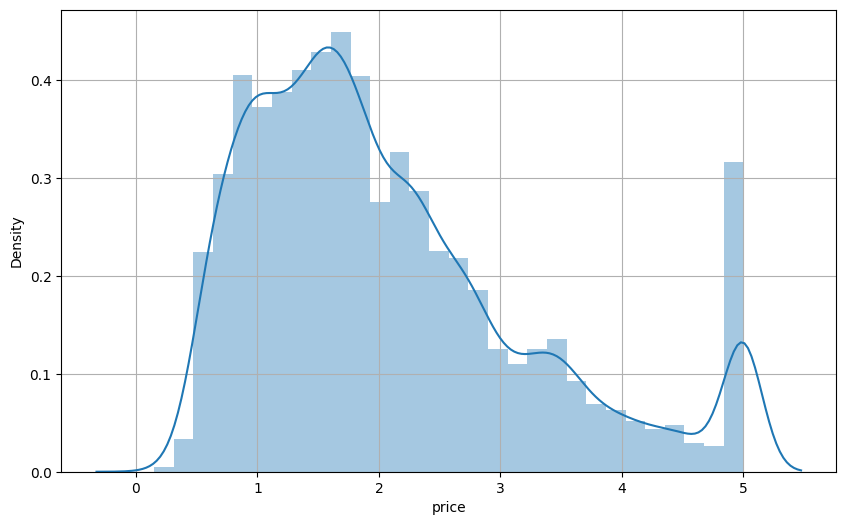

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(data['price'],bins=30)
plt.grid()
plt.show()

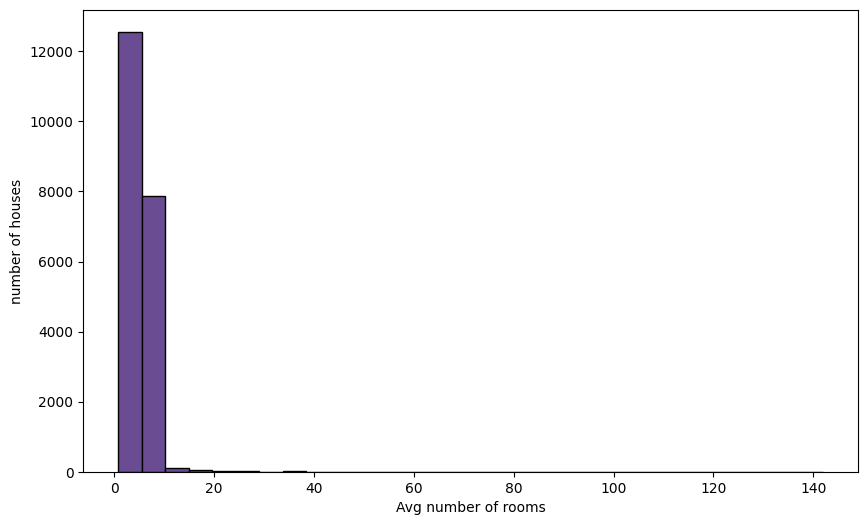

In [26]:
plt.figure(figsize=(10,6))
plt.hist(data['AveRooms'],bins =30,ec = 'black',color='#6A4C93')
plt.xlabel('Avg number of rooms')
plt.ylabel('number of houses')
plt
plt.show()

In [32]:
data['AveRooms'].mean()

5.428999742190376